# Imports

In [1]:
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
import numpy as np
from numpy.linalg import norm
import os
from tqdm import tqdm
import pickle

# Load Images

In [2]:
# Define the images directory
images_path ="images"

# Collect full paths for image files
filenames = [os.path.join(images_path, file) for file in os.listdir(images_path)
             if file.lower().endswith(('.jpg', '.jpeg', '.png'))]

In [3]:
filenames[:5]

['images\\10000.jpg',
 'images\\10001.jpg',
 'images\\10002.jpg',
 'images\\10003.jpg',
 'images\\10004.jpg']

# Load Model

In [4]:
model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False

model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

# Feature Extraction (Embeddings)

In [5]:
def extract_features(img_path,model):
    img = image.load_img(img_path,target_size=(224,224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)

    return normalized_result

In [ ]:
feature_list = []

for file in tqdm(filenames):
    feature_list.append(extract_features(file,model))

  0%|                                                                                        | 0/44441 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


  0%|                                                                             | 1/44441 [00:06<80:21:51,  6.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


  0%|                                                                             | 2/44441 [00:06<35:39:09,  2.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


  0%|                                                                             | 3/44441 [00:07<21:35:45,  1.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


  0%|                                                                             | 4/44441 [00:07<15:07:07,  1.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


  0%|                                                                             | 5/44441 [00:08<11:33:45,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


  0%|                                                                              | 6/44441 [00:08<9:16:44,  1.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


  0%|                                                                              | 7/44441 [00:08<7:50:16,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


  0%|                                                                              | 8/44441 [00:09<6:53:27,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


  0%|                                                                              | 9/44441 [00:09<6:17:52,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


  0%|                                                                             | 10/44441 [00:10<5:57:19,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


  0%|                                                                             | 11/44441 [00:10<5:40:59,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


  0%|                                                                             | 12/44441 [00:10<5:27:46,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


  0%|                                                                             | 13/44441 [00:11<5:20:51,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


  0%|                                                                             | 14/44441 [00:11<5:17:36,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


  0%|                                                                             | 15/44441 [00:12<5:09:16,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  0%|                                                                             | 16/44441 [00:12<4:54:38,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


  0%|                                                                             | 17/44441 [00:12<4:57:07,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


  0%|                                                                             | 18/44441 [00:13<5:01:36,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


  0%|                                                                             | 19/44441 [00:13<4:58:40,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


  0%|                                                                             | 20/44441 [00:14<4:57:48,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


  0%|                                                                             | 21/44441 [00:14<5:13:20,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step


  0%|                                                                             | 22/44441 [00:15<5:39:24,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


  0%|                                                                             | 23/44441 [00:15<5:24:36,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


  0%|                                                                             | 24/44441 [00:15<5:27:09,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


  0%|                                                                             | 25/44441 [00:16<5:32:57,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


  0%|                                                                             | 26/44441 [00:16<5:10:02,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


  0%|                                                                             | 27/44441 [00:17<5:13:15,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


  0%|                                                                             | 28/44441 [00:17<5:04:48,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


  0%|                                                                             | 29/44441 [00:17<4:44:32,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  0%|                                                                             | 30/44441 [00:18<4:42:15,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


  0%|                                                                             | 31/44441 [00:18<4:45:58,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


  0%|                                                                             | 32/44441 [00:19<4:40:28,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


  0%|                                                                             | 33/44441 [00:19<4:35:06,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  0%|                                                                             | 34/44441 [00:19<4:24:52,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  0%|                                                                             | 35/44441 [00:20<5:00:14,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  0%|                                                                             | 36/44441 [00:20<4:43:47,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  0%|                                                                             | 37/44441 [00:20<4:42:31,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


  0%|                                                                             | 38/44441 [00:21<4:37:22,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


  0%|                                                                             | 39/44441 [00:21<4:37:57,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


  0%|                                                                             | 40/44441 [00:22<4:42:19,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


  0%|                                                                             | 41/44441 [00:22<4:25:54,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  0%|                                                                             | 42/44441 [00:22<4:32:38,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


  0%|                                                                             | 43/44441 [00:23<4:39:25,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


  0%|                                                                             | 44/44441 [00:23<4:36:43,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


  0%|                                                                             | 45/44441 [00:23<4:39:25,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


  0%|                                                                             | 46/44441 [00:24<4:29:17,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  0%|                                                                             | 47/44441 [00:24<4:22:59,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


  0%|                                                                             | 48/44441 [00:25<4:37:28,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


  0%|                                                                             | 49/44441 [00:25<4:41:57,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


  0%|                                                                             | 50/44441 [00:25<4:44:41,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


  0%|                                                                             | 51/44441 [00:26<4:40:11,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


  0%|                                                                             | 52/44441 [00:26<5:59:53,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


  0%|                                                                             | 53/44441 [00:27<5:38:49,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


  0%|                                                                             | 54/44441 [00:27<5:29:31,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


  0%|                                                                             | 55/44441 [00:28<5:12:09,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


  0%|                                                                             | 56/44441 [00:28<5:01:08,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


  0%|                                                                             | 57/44441 [00:28<5:10:32,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  0%|                                                                             | 58/44441 [00:29<5:08:21,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


  0%|                                                                             | 59/44441 [00:29<5:07:00,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


  0%|                                                                             | 60/44441 [00:30<5:11:58,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


  0%|                                                                             | 61/44441 [00:30<5:36:42,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


  0%|                                                                             | 62/44441 [00:31<5:43:10,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


  0%|                                                                             | 63/44441 [00:31<5:39:16,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


  0%|                                                                             | 64/44441 [00:32<5:44:40,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


  0%|                                                                             | 65/44441 [00:32<5:46:07,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


  0%|                                                                             | 66/44441 [00:33<5:46:35,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


  0%|                                                                             | 67/44441 [00:33<5:43:34,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


  0%|                                                                             | 68/44441 [00:33<5:35:37,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


  0%|                                                                             | 69/44441 [00:34<5:36:21,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


  0%|                                                                             | 70/44441 [00:34<5:35:43,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


  0%|                                                                             | 71/44441 [00:35<5:43:14,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


  0%|                                                                             | 72/44441 [00:35<5:44:24,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


  0%|▏                                                                            | 73/44441 [00:36<5:59:07,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


  0%|▏                                                                            | 74/44441 [00:37<7:22:46,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


  0%|▏                                                                            | 75/44441 [00:37<7:14:48,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


  0%|▏                                                                            | 76/44441 [00:38<6:56:10,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


  0%|▏                                                                            | 77/44441 [00:38<6:30:57,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


  0%|▏                                                                            | 78/44441 [00:39<6:33:08,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


  0%|▏                                                                            | 79/44441 [00:39<6:30:27,  1.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


  0%|▏                                                                            | 80/44441 [00:40<6:11:18,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


  0%|▏                                                                            | 81/44441 [00:40<6:02:17,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


  0%|▏                                                                            | 82/44441 [00:41<6:07:08,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


  0%|▏                                                                            | 83/44441 [00:41<6:07:38,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


  0%|▏                                                                            | 84/44441 [00:42<6:00:15,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


  0%|▏                                                                            | 85/44441 [00:42<5:57:17,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


  0%|▏                                                                            | 86/44441 [00:43<5:52:04,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


  0%|▏                                                                            | 87/44441 [00:43<5:56:45,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


  0%|▏                                                                            | 88/44441 [00:44<5:54:57,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


  0%|▏                                                                            | 89/44441 [00:44<5:52:11,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


  0%|▏                                                                            | 90/44441 [00:45<5:49:53,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


  0%|▏                                                                            | 91/44441 [00:45<5:48:04,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


  0%|▏                                                                            | 92/44441 [00:45<5:38:48,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


  0%|▏                                                                            | 93/44441 [00:46<5:43:52,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


  0%|▏                                                                            | 94/44441 [00:46<5:47:43,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


  0%|▏                                                                            | 95/44441 [00:47<5:48:16,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


  0%|▏                                                                            | 96/44441 [00:47<5:41:37,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


  0%|▏                                                                            | 97/44441 [00:48<5:35:44,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


  0%|▏                                                                            | 98/44441 [00:48<5:32:49,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


  0%|▏                                                                            | 99/44441 [00:49<5:33:24,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


  0%|▏                                                                           | 100/44441 [00:49<5:31:53,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


  0%|▏                                                                           | 101/44441 [00:50<5:31:48,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


  0%|▏                                                                           | 102/44441 [00:50<5:45:29,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


  0%|▏                                                                           | 103/44441 [00:50<5:43:54,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


  0%|▏                                                                           | 104/44441 [00:51<5:39:56,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


  0%|▏                                                                           | 105/44441 [00:51<5:41:14,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


  0%|▏                                                                           | 106/44441 [00:52<5:40:25,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


  0%|▏                                                                           | 107/44441 [00:52<5:45:16,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


  0%|▏                                                                           | 108/44441 [00:53<5:42:16,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


  0%|▏                                                                           | 109/44441 [00:53<5:39:02,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


  0%|▏                                                                           | 110/44441 [00:54<5:46:46,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


  0%|▏                                                                           | 111/44441 [00:54<5:35:52,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


  0%|▏                                                                           | 112/44441 [00:55<5:36:33,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


  0%|▏                                                                           | 113/44441 [00:55<5:32:19,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


  0%|▏                                                                           | 114/44441 [00:55<5:31:01,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


  0%|▏                                                                           | 115/44441 [00:56<5:29:53,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


  0%|▏                                                                           | 116/44441 [00:56<5:29:29,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


  0%|▏                                                                           | 117/44441 [00:57<5:23:08,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


  0%|▏                                                                           | 118/44441 [00:57<5:25:17,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


  0%|▏                                                                           | 119/44441 [00:58<5:21:43,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


  0%|▏                                                                           | 120/44441 [00:58<5:23:37,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


  0%|▏                                                                           | 121/44441 [00:59<5:22:11,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


  0%|▏                                                                           | 122/44441 [00:59<5:19:26,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


  0%|▏                                                                           | 123/44441 [00:59<5:16:59,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


  0%|▏                                                                           | 124/44441 [01:00<5:21:55,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


  0%|▏                                                                           | 125/44441 [01:00<5:18:34,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


  0%|▏                                                                           | 126/44441 [01:01<5:17:26,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


  0%|▏                                                                           | 127/44441 [01:01<5:43:06,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


  0%|▏                                                                           | 128/44441 [01:02<5:36:57,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


  0%|▏                                                                           | 129/44441 [01:02<5:32:26,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


  0%|▏                                                                           | 130/44441 [01:03<5:38:26,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


  0%|▏                                                                           | 131/44441 [01:03<5:40:32,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


  0%|▏                                                                           | 132/44441 [01:04<5:38:55,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


  0%|▏                                                                           | 133/44441 [01:04<5:38:20,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


  0%|▏                                                                           | 134/44441 [01:04<5:41:00,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


  0%|▏                                                                           | 135/44441 [01:05<5:37:26,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


  0%|▏                                                                           | 136/44441 [01:05<6:01:50,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


  0%|▏                                                                           | 137/44441 [01:06<5:50:16,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


  0%|▏                                                                           | 138/44441 [01:06<5:48:37,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


  0%|▏                                                                           | 139/44441 [01:07<6:09:43,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


  0%|▏                                                                           | 140/44441 [01:07<6:00:24,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


  0%|▏                                                                           | 141/44441 [01:08<6:04:58,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


  0%|▏                                                                           | 142/44441 [01:08<5:56:11,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


  0%|▏                                                                           | 143/44441 [01:09<5:43:58,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


  0%|▏                                                                           | 144/44441 [01:09<5:40:05,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


  0%|▏                                                                           | 145/44441 [01:10<5:57:21,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


  0%|▏                                                                           | 146/44441 [01:10<5:54:29,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


  0%|▎                                                                           | 147/44441 [01:11<5:56:44,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


  0%|▎                                                                           | 148/44441 [01:11<5:57:16,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


  0%|▎                                                                           | 149/44441 [01:12<7:07:13,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


  0%|▎                                                                           | 150/44441 [01:12<6:38:24,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


  0%|▎                                                                           | 151/44441 [01:13<6:12:19,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


  0%|▎                                                                           | 152/44441 [01:13<5:59:11,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


  0%|▎                                                                           | 153/44441 [01:14<5:57:01,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


  0%|▎                                                                           | 154/44441 [01:14<5:51:10,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


  0%|▎                                                                           | 155/44441 [01:15<5:52:47,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


  0%|▎                                                                           | 156/44441 [01:15<5:45:10,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


  0%|▎                                                                           | 157/44441 [01:16<5:49:32,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


  0%|▎                                                                           | 158/44441 [01:16<5:43:07,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


  0%|▎                                                                           | 159/44441 [01:17<6:05:43,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


  0%|▎                                                                           | 160/44441 [01:17<5:52:20,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


  0%|▎                                                                           | 161/44441 [01:18<5:42:54,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step


  0%|▎                                                                           | 162/44441 [01:18<5:27:02,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


  0%|▎                                                                           | 163/44441 [01:18<5:31:19,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


  0%|▎                                                                           | 164/44441 [01:19<5:28:50,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


  0%|▎                                                                           | 165/44441 [01:19<5:22:38,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


  0%|▎                                                                           | 166/44441 [01:20<5:20:29,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step


  0%|▎                                                                           | 167/44441 [01:20<5:49:25,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


  0%|▎                                                                           | 168/44441 [01:21<5:38:00,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


  0%|▎                                                                           | 169/44441 [01:21<5:30:37,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


  0%|▎                                                                           | 170/44441 [01:22<5:24:00,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


  0%|▎                                                                           | 171/44441 [01:22<5:37:25,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


  0%|▎                                                                           | 172/44441 [01:22<5:29:50,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


  0%|▎                                                                           | 173/44441 [01:23<5:23:40,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


  0%|▎                                                                           | 174/44441 [01:23<5:23:06,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


  0%|▎                                                                           | 175/44441 [01:24<5:20:48,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


  0%|▎                                                                           | 176/44441 [01:24<5:25:31,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


  0%|▎                                                                           | 177/44441 [01:25<5:18:14,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


  0%|▎                                                                           | 178/44441 [01:25<5:14:03,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


  0%|▎                                                                           | 179/44441 [01:25<5:13:59,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


  0%|▎                                                                           | 180/44441 [01:26<5:31:37,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


  0%|▎                                                                           | 181/44441 [01:26<5:32:45,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


  0%|▎                                                                           | 182/44441 [01:27<5:31:33,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


  0%|▎                                                                           | 183/44441 [01:27<5:29:41,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


  0%|▎                                                                           | 184/44441 [01:28<5:19:27,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


  0%|▎                                                                           | 185/44441 [01:28<5:14:51,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


  0%|▎                                                                           | 186/44441 [01:29<5:18:24,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


  0%|▎                                                                           | 187/44441 [01:29<5:15:17,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


  0%|▎                                                                           | 188/44441 [01:29<5:11:55,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step


  0%|▎                                                                           | 189/44441 [01:30<5:16:09,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


  0%|▎                                                                           | 190/44441 [01:30<5:14:17,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


  0%|▎                                                                           | 191/44441 [01:31<5:18:54,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


  0%|▎                                                                           | 192/44441 [01:31<5:20:03,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


  0%|▎                                                                           | 193/44441 [01:32<5:15:28,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


  0%|▎                                                                           | 194/44441 [01:32<5:38:56,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


  0%|▎                                                                           | 195/44441 [01:33<5:41:51,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


  0%|▎                                                                           | 196/44441 [01:33<5:39:46,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


  0%|▎                                                                           | 197/44441 [01:33<5:40:02,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


  0%|▎                                                                           | 198/44441 [01:34<5:39:17,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


  0%|▎                                                                           | 199/44441 [01:34<5:40:22,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


  0%|▎                                                                           | 200/44441 [01:35<5:50:57,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


  0%|▎                                                                           | 201/44441 [01:35<5:51:30,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


  0%|▎                                                                           | 202/44441 [01:36<5:42:31,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


  0%|▎                                                                           | 203/44441 [01:36<5:41:17,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


  0%|▎                                                                           | 204/44441 [01:37<5:44:49,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


  0%|▎                                                                           | 205/44441 [01:37<5:47:59,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


  0%|▎                                                                           | 206/44441 [01:38<5:49:13,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


  0%|▎                                                                           | 207/44441 [01:38<5:49:45,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


  0%|▎                                                                           | 208/44441 [01:39<5:43:13,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


  0%|▎                                                                           | 209/44441 [01:39<5:43:55,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


  0%|▎                                                                           | 210/44441 [01:40<5:40:34,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


  0%|▎                                                                           | 211/44441 [01:40<5:39:48,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


  0%|▎                                                                           | 212/44441 [01:40<5:41:58,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


  0%|▎                                                                           | 213/44441 [01:41<5:43:09,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


  0%|▎                                                                           | 214/44441 [01:41<5:41:43,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


  0%|▎                                                                           | 215/44441 [01:42<6:56:23,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


  0%|▎                                                                           | 216/44441 [01:43<6:10:49,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


  0%|▎                                                                           | 217/44441 [01:43<6:15:34,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step


  0%|▎                                                                           | 218/44441 [01:44<8:00:27,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


  0%|▎                                                                           | 219/44441 [01:45<7:24:35,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


  0%|▍                                                                           | 220/44441 [01:45<6:41:03,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


  0%|▍                                                                           | 221/44441 [01:45<6:11:30,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


  0%|▍                                                                           | 222/44441 [01:46<5:58:48,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


  1%|▍                                                                           | 223/44441 [01:46<5:47:07,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


  1%|▍                                                                           | 224/44441 [01:47<5:49:26,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


  1%|▍                                                                           | 225/44441 [01:47<5:37:17,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


  1%|▍                                                                           | 226/44441 [01:48<5:33:23,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


  1%|▍                                                                           | 227/44441 [01:48<5:32:49,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


  1%|▍                                                                           | 228/44441 [01:48<5:31:11,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


  1%|▍                                                                           | 229/44441 [01:49<5:30:37,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


  1%|▍                                                                           | 230/44441 [01:49<5:29:10,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


  1%|▍                                                                           | 231/44441 [01:50<5:23:12,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


  1%|▍                                                                           | 232/44441 [01:50<5:14:58,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


  1%|▍                                                                           | 233/44441 [01:51<5:19:27,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


  1%|▍                                                                           | 234/44441 [01:51<5:20:16,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


  1%|▍                                                                           | 235/44441 [01:52<5:21:40,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


  1%|▍                                                                           | 236/44441 [01:52<5:25:05,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


  1%|▍                                                                           | 237/44441 [01:52<5:25:15,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


  1%|▍                                                                           | 238/44441 [01:53<5:04:09,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


  1%|▍                                                                           | 239/44441 [01:53<5:09:23,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


  1%|▍                                                                           | 240/44441 [01:54<5:16:22,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


  1%|▍                                                                           | 241/44441 [01:54<5:21:34,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


  1%|▍                                                                           | 242/44441 [01:55<5:22:14,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


  1%|▍                                                                           | 243/44441 [01:55<5:21:01,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


  1%|▍                                                                           | 244/44441 [01:55<5:24:49,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


  1%|▍                                                                           | 245/44441 [01:56<5:25:22,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


  1%|▍                                                                           | 246/44441 [01:56<5:22:10,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


  1%|▍                                                                           | 247/44441 [01:57<5:22:27,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


  1%|▍                                                                           | 248/44441 [01:57<5:22:58,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


  1%|▍                                                                           | 249/44441 [01:58<5:24:48,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


  1%|▍                                                                           | 250/44441 [01:58<5:26:16,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


  1%|▍                                                                           | 251/44441 [01:58<5:25:38,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


  1%|▍                                                                           | 252/44441 [01:59<5:26:45,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


  1%|▍                                                                           | 253/44441 [01:59<5:28:37,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


  1%|▍                                                                           | 254/44441 [02:00<5:27:34,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


  1%|▍                                                                           | 255/44441 [02:00<5:32:38,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


  1%|▍                                                                           | 256/44441 [02:01<5:30:48,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


  1%|▍                                                                           | 257/44441 [02:01<5:32:39,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


  1%|▍                                                                           | 258/44441 [02:02<5:33:16,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


  1%|▍                                                                           | 259/44441 [02:02<5:33:24,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


  1%|▍                                                                           | 260/44441 [02:02<5:10:35,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


  1%|▍                                                                           | 261/44441 [02:03<5:19:25,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


  1%|▍                                                                           | 262/44441 [02:03<5:27:07,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


  1%|▍                                                                           | 263/44441 [02:04<5:31:12,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


  1%|▍                                                                           | 264/44441 [02:04<5:36:04,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


  1%|▍                                                                           | 265/44441 [02:05<5:34:33,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


  1%|▍                                                                           | 266/44441 [02:05<5:34:22,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


  1%|▍                                                                           | 267/44441 [02:06<5:34:11,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


  1%|▍                                                                           | 268/44441 [02:06<5:37:55,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


  1%|▍                                                                           | 269/44441 [02:07<5:38:33,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


  1%|▍                                                                           | 270/44441 [02:07<5:34:52,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


  1%|▍                                                                           | 271/44441 [02:08<5:39:37,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


  1%|▍                                                                           | 272/44441 [02:08<5:37:07,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


  1%|▍                                                                           | 273/44441 [02:08<5:41:38,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


  1%|▍                                                                           | 274/44441 [02:09<5:41:42,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


  1%|▍                                                                           | 275/44441 [02:09<5:40:08,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


  1%|▍                                                                           | 276/44441 [02:10<5:37:44,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


  1%|▍                                                                           | 277/44441 [02:10<5:42:05,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


  1%|▍                                                                           | 278/44441 [02:11<5:39:42,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


  1%|▍                                                                           | 279/44441 [02:11<5:39:34,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


  1%|▍                                                                           | 280/44441 [02:12<5:39:33,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


  1%|▍                                                                           | 281/44441 [02:12<5:38:28,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


  1%|▍                                                                           | 282/44441 [02:13<5:36:37,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


  1%|▍                                                                           | 283/44441 [02:13<5:34:47,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


  1%|▍                                                                           | 284/44441 [02:14<5:38:58,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


  1%|▍                                                                           | 285/44441 [02:14<5:45:59,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


  1%|▍                                                                           | 286/44441 [02:14<5:44:16,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


  1%|▍                                                                           | 287/44441 [02:15<5:44:44,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


  1%|▍                                                                           | 288/44441 [02:15<5:43:45,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


  1%|▍                                                                           | 289/44441 [02:16<5:43:01,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


  1%|▍                                                                           | 290/44441 [02:16<5:39:56,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


  1%|▍                                                                           | 291/44441 [02:17<5:41:43,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


  1%|▍                                                                           | 292/44441 [02:17<5:44:54,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


  1%|▌                                                                           | 293/44441 [02:18<5:59:34,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


  1%|▌                                                                           | 294/44441 [02:18<5:54:39,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


  1%|▌                                                                           | 295/44441 [02:19<5:44:48,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


  1%|▌                                                                           | 296/44441 [02:19<5:36:00,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


  1%|▌                                                                           | 297/44441 [02:20<5:32:12,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


  1%|▌                                                                           | 298/44441 [02:20<5:31:06,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


  1%|▌                                                                           | 299/44441 [02:20<5:28:30,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


  1%|▌                                                                           | 300/44441 [02:21<5:52:37,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step


  1%|▌                                                                           | 301/44441 [02:21<5:41:26,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


  1%|▌                                                                           | 302/44441 [02:22<5:33:27,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


  1%|▌                                                                           | 303/44441 [02:22<5:26:08,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


  1%|▌                                                                           | 304/44441 [02:23<5:18:50,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


  1%|▌                                                                           | 305/44441 [02:23<5:17:04,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


  1%|▌                                                                           | 306/44441 [02:24<5:17:44,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


  1%|▌                                                                           | 307/44441 [02:24<5:15:56,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


  1%|▌                                                                           | 308/44441 [02:24<5:15:13,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


  1%|▌                                                                           | 309/44441 [02:25<5:14:40,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


  1%|▌                                                                           | 310/44441 [02:25<5:12:40,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


  1%|▌                                                                           | 311/44441 [02:26<5:13:53,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


  1%|▌                                                                           | 312/44441 [02:26<5:11:29,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


  1%|▌                                                                           | 313/44441 [02:27<5:12:00,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


  1%|▌                                                                           | 314/44441 [02:27<5:11:57,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


  1%|▌                                                                           | 315/44441 [02:27<5:17:18,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


  1%|▌                                                                           | 316/44441 [02:28<5:21:05,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


  1%|▌                                                                           | 317/44441 [02:28<5:24:12,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


  1%|▌                                                                           | 318/44441 [02:29<5:23:41,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


  1%|▌                                                                           | 319/44441 [02:29<5:17:08,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


  1%|▌                                                                           | 320/44441 [02:30<5:22:36,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


  1%|▌                                                                           | 321/44441 [02:30<5:21:35,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


  1%|▌                                                                           | 322/44441 [02:30<5:19:00,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


  1%|▌                                                                           | 323/44441 [02:31<5:18:00,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


  1%|▌                                                                           | 324/44441 [02:31<5:20:02,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


  1%|▌                                                                           | 325/44441 [02:32<5:22:13,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


  1%|▌                                                                           | 326/44441 [02:32<5:30:50,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


  1%|▌                                                                           | 327/44441 [02:33<5:39:33,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


  1%|▌                                                                           | 328/44441 [02:33<5:42:10,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


  1%|▌                                                                           | 329/44441 [02:34<6:04:29,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


  1%|▌                                                                           | 330/44441 [02:34<5:54:42,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


  1%|▌                                                                           | 331/44441 [02:35<5:49:05,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step


  1%|▌                                                                           | 332/44441 [02:35<5:45:47,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


  1%|▌                                                                           | 333/44441 [02:36<5:51:21,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


  1%|▌                                                                           | 334/44441 [02:36<5:55:54,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


  1%|▌                                                                           | 335/44441 [02:37<6:03:23,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


  1%|▌                                                                           | 336/44441 [02:37<6:04:14,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


  1%|▌                                                                           | 337/44441 [02:38<6:12:33,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


  1%|▌                                                                           | 338/44441 [02:38<6:09:54,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


  1%|▌                                                                           | 339/44441 [02:39<6:01:09,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


  1%|▌                                                                           | 340/44441 [02:39<5:53:39,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


  1%|▌                                                                           | 341/44441 [02:40<6:03:50,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


  1%|▌                                                                           | 342/44441 [02:40<5:55:24,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


  1%|▌                                                                           | 343/44441 [02:41<6:15:12,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


  1%|▌                                                                           | 344/44441 [02:41<6:21:16,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


  1%|▌                                                                           | 345/44441 [02:42<6:01:21,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


  1%|▌                                                                           | 346/44441 [02:42<5:58:35,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step


  1%|▌                                                                           | 347/44441 [02:43<5:49:08,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


  1%|▌                                                                           | 348/44441 [02:43<6:04:00,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


  1%|▌                                                                           | 349/44441 [02:44<5:57:36,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


  1%|▌                                                                           | 350/44441 [02:44<5:54:43,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


  1%|▌                                                                           | 351/44441 [02:45<5:47:59,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


  1%|▌                                                                           | 352/44441 [02:45<5:39:06,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


  1%|▌                                                                           | 353/44441 [02:45<5:32:35,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


  1%|▌                                                                           | 354/44441 [02:46<5:34:44,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


  1%|▌                                                                           | 355/44441 [02:46<5:29:01,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


  1%|▌                                                                           | 356/44441 [02:47<5:31:19,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


  1%|▌                                                                           | 357/44441 [02:47<5:33:52,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


  1%|▌                                                                           | 358/44441 [02:48<5:29:49,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


  1%|▌                                                                           | 359/44441 [02:48<5:31:25,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


  1%|▌                                                                           | 360/44441 [02:49<5:28:35,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


  1%|▌                                                                           | 361/44441 [02:49<5:27:55,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


  1%|▌                                                                           | 362/44441 [02:50<5:50:05,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


  1%|▌                                                                           | 363/44441 [02:50<5:36:06,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


  1%|▌                                                                           | 364/44441 [02:50<5:30:29,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


  1%|▌                                                                           | 365/44441 [02:51<5:45:26,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step


  1%|▋                                                                           | 366/44441 [02:51<5:33:27,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


  1%|▋                                                                           | 367/44441 [02:52<5:29:03,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


  1%|▋                                                                           | 368/44441 [02:52<5:29:33,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


  1%|▋                                                                           | 369/44441 [02:53<5:33:20,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


  1%|▋                                                                           | 370/44441 [02:53<5:29:47,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


  1%|▋                                                                           | 371/44441 [02:54<5:33:12,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


  1%|▋                                                                           | 372/44441 [02:54<5:31:20,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


  1%|▋                                                                           | 373/44441 [02:54<5:26:50,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


  1%|▋                                                                           | 374/44441 [02:55<5:22:52,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


  1%|▋                                                                           | 375/44441 [02:55<5:19:58,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


  1%|▋                                                                           | 376/44441 [02:56<5:18:47,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


  1%|▋                                                                           | 377/44441 [02:56<5:17:57,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


  1%|▋                                                                           | 378/44441 [02:57<5:31:11,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


  1%|▋                                                                           | 379/44441 [02:57<5:30:24,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


  1%|▋                                                                           | 380/44441 [02:58<5:27:53,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


  1%|▋                                                                           | 381/44441 [02:58<5:29:39,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


  1%|▋                                                                           | 382/44441 [02:58<5:28:05,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


  1%|▋                                                                           | 383/44441 [02:59<5:23:53,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


  1%|▋                                                                           | 384/44441 [02:59<5:33:13,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


  1%|▋                                                                           | 385/44441 [03:00<5:28:29,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


  1%|▋                                                                           | 386/44441 [03:00<5:30:04,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


  1%|▋                                                                           | 387/44441 [03:01<5:30:58,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


  1%|▋                                                                           | 388/44441 [03:01<5:34:01,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


  1%|▋                                                                           | 389/44441 [03:02<5:30:08,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


  1%|▋                                                                           | 390/44441 [03:02<5:30:21,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


  1%|▋                                                                           | 391/44441 [03:02<5:29:40,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


  1%|▋                                                                           | 392/44441 [03:03<5:27:25,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


  1%|▋                                                                           | 393/44441 [03:03<5:17:24,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


  1%|▋                                                                           | 394/44441 [03:04<5:10:07,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


  1%|▋                                                                           | 395/44441 [03:04<5:12:40,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


  1%|▋                                                                           | 396/44441 [03:05<5:16:53,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


  1%|▋                                                                           | 397/44441 [03:05<5:20:33,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


  1%|▋                                                                           | 398/44441 [03:05<5:24:25,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


  1%|▋                                                                           | 399/44441 [03:06<5:48:45,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


  1%|▋                                                                           | 400/44441 [03:06<5:29:50,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


  1%|▋                                                                           | 401/44441 [03:07<5:26:56,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


  1%|▋                                                                           | 402/44441 [03:07<5:28:16,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


  1%|▋                                                                           | 403/44441 [03:08<5:24:56,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


  1%|▋                                                                           | 404/44441 [03:08<5:40:49,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


  1%|▋                                                                           | 405/44441 [03:09<5:37:06,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


  1%|▋                                                                           | 406/44441 [03:09<5:38:39,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


  1%|▋                                                                           | 407/44441 [03:10<5:35:32,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


  1%|▋                                                                           | 408/44441 [03:10<5:43:46,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


  1%|▋                                                                           | 409/44441 [03:11<5:36:19,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


  1%|▋                                                                           | 410/44441 [03:11<5:35:05,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


  1%|▋                                                                           | 411/44441 [03:11<5:35:30,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


  1%|▋                                                                           | 412/44441 [03:12<5:39:30,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


  1%|▋                                                                           | 413/44441 [03:12<5:39:27,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


  1%|▋                                                                           | 414/44441 [03:13<5:40:04,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


  1%|▋                                                                           | 415/44441 [03:13<5:43:32,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


  1%|▋                                                                           | 416/44441 [03:14<5:43:05,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


  1%|▋                                                                           | 417/44441 [03:14<5:39:21,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


  1%|▋                                                                           | 418/44441 [03:15<5:33:45,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


  1%|▋                                                                           | 419/44441 [03:15<5:37:19,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


  1%|▋                                                                           | 420/44441 [03:16<5:36:32,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


  1%|▋                                                                           | 421/44441 [03:16<5:37:23,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


  1%|▋                                                                           | 422/44441 [03:17<5:34:04,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


  1%|▋                                                                           | 423/44441 [03:17<5:32:02,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


  1%|▋                                                                           | 424/44441 [03:17<5:29:31,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


  1%|▋                                                                           | 425/44441 [03:18<5:35:15,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


  1%|▋                                                                           | 426/44441 [03:18<5:35:44,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


  1%|▋                                                                           | 427/44441 [03:19<5:32:16,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


  1%|▋                                                                           | 428/44441 [03:19<5:25:47,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


  1%|▋                                                                           | 429/44441 [03:20<5:46:29,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


  1%|▋                                                                           | 430/44441 [03:20<5:34:04,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


  1%|▋                                                                           | 431/44441 [03:21<5:28:33,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


  1%|▋                                                                           | 432/44441 [03:21<5:30:45,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


  1%|▋                                                                           | 433/44441 [03:22<5:28:38,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


  1%|▋                                                                           | 434/44441 [03:22<5:19:42,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


  1%|▋                                                                           | 435/44441 [03:22<5:18:05,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


  1%|▋                                                                           | 436/44441 [03:23<5:37:35,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


  1%|▋                                                                           | 437/44441 [03:23<5:30:58,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


  1%|▋                                                                           | 438/44441 [03:24<5:21:01,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


  1%|▊                                                                           | 439/44441 [03:24<5:11:56,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step


  1%|▊                                                                           | 440/44441 [03:25<5:10:18,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


  1%|▊                                                                           | 441/44441 [03:25<5:11:32,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


  1%|▊                                                                           | 442/44441 [03:25<5:11:14,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


  1%|▊                                                                           | 443/44441 [03:26<5:29:53,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


  1%|▊                                                                           | 444/44441 [03:26<5:29:35,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


  1%|▊                                                                           | 445/44441 [03:27<5:28:27,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


  1%|▊                                                                           | 446/44441 [03:27<5:28:59,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


  1%|▊                                                                           | 447/44441 [03:28<5:28:00,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


  1%|▊                                                                           | 448/44441 [03:28<5:29:05,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


  1%|▊                                                                           | 449/44441 [03:29<5:28:31,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


  1%|▊                                                                           | 450/44441 [03:29<5:26:23,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


  1%|▊                                                                           | 451/44441 [03:29<5:26:45,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


  1%|▊                                                                           | 452/44441 [03:30<5:30:00,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


  1%|▊                                                                           | 453/44441 [03:30<5:30:57,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


  1%|▊                                                                           | 454/44441 [03:31<5:36:15,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


  1%|▊                                                                           | 455/44441 [03:31<5:15:46,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


  1%|▊                                                                           | 456/44441 [03:32<5:14:27,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


  1%|▊                                                                           | 457/44441 [03:32<5:10:20,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


  1%|▊                                                                           | 458/44441 [03:32<5:17:55,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


  1%|▊                                                                           | 459/44441 [03:33<6:09:59,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


  1%|▊                                                                           | 460/44441 [03:34<7:46:26,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


  1%|▊                                                                           | 461/44441 [03:35<7:33:30,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


  1%|▊                                                                           | 462/44441 [03:36<8:24:03,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


  1%|▊                                                                           | 463/44441 [03:36<7:24:43,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step


  1%|▊                                                                           | 464/44441 [03:37<7:44:38,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


  1%|▊                                                                           | 465/44441 [03:37<7:29:42,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


  1%|▊                                                                           | 466/44441 [03:38<7:14:37,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


  1%|▊                                                                           | 467/44441 [03:38<6:52:06,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


  1%|▊                                                                           | 468/44441 [03:39<6:28:59,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


  1%|▊                                                                           | 469/44441 [03:39<6:01:36,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


  1%|▊                                                                           | 470/44441 [03:40<5:49:05,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


  1%|▊                                                                           | 471/44441 [03:40<5:47:07,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


  1%|▊                                                                           | 472/44441 [03:40<5:42:12,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step


  1%|▊                                                                           | 473/44441 [03:41<5:36:40,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


  1%|▊                                                                           | 474/44441 [03:41<5:49:22,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


  1%|▊                                                                           | 475/44441 [03:42<5:57:11,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


  1%|▊                                                                           | 476/44441 [03:42<5:41:26,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


  1%|▊                                                                           | 477/44441 [03:43<5:54:20,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


  1%|▊                                                                           | 478/44441 [03:43<6:11:14,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


  1%|▊                                                                           | 479/44441 [03:44<6:06:29,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


  1%|▊                                                                           | 480/44441 [03:44<6:01:39,  2.03it/s]

# Save Files

In [ ]:
pickle.dump(feature_list,open('embeddings.pkl','wb'))
pickle.dump(filenames,open('filenames.pkl','wb'))

# Recommendation System

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


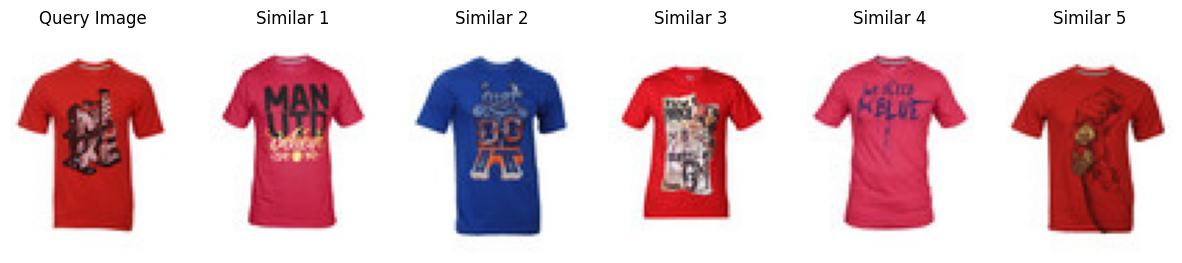

In [9]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
from numpy.linalg import norm
from sklearn.metrics.pairwise import cosine_similarity

# Load saved embeddings and filenames
feature_list = pickle.load(open('embeddings.pkl', 'rb'))
filenames = pickle.load(open('filenames.pkl', 'rb'))

def extract_features(img_path, model):
    """Extract features from a given image using the trained model."""
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)
    
    return normalized_result

def recommend_similar_images(query_img_path, model, top_n=5):
    """Given an input image, recommend top 5 visually similar images."""
    
    # Extract features of the input image
    query_features = extract_features(query_img_path, model).reshape(1, -1)
    
    # Compute cosine similarity
    similarities = cosine_similarity(query_features, feature_list)[0]
    
    # Get indices of top 5 most similar images
    top_indices = np.argsort(similarities)[::-1][1:top_n+1]  # Exclude the query image itself
    
    # Display the query image
    fig, axes = plt.subplots(1, top_n+1, figsize=(15, 5))
    
    # Load and display the query image
    query_img = cv2.imread(query_img_path)
    query_img = cv2.cvtColor(query_img, cv2.COLOR_BGR2RGB)
    axes[0].imshow(query_img)
    axes[0].set_title("Query Image")
    axes[0].axis("off")

    # Display recommended images
    for i, idx in enumerate(top_indices):
        similar_img = cv2.imread(filenames[idx])
        similar_img = cv2.cvtColor(similar_img, cv2.COLOR_BGR2RGB)
        axes[i+1].imshow(similar_img)
        axes[i+1].set_title(f"Similar {i+1}")
        axes[i+1].axis("off")

    plt.show()

# Example usage:
recommend_similar_images("/kaggle/input/fashion-product-images-small/images/10009.jpg", model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


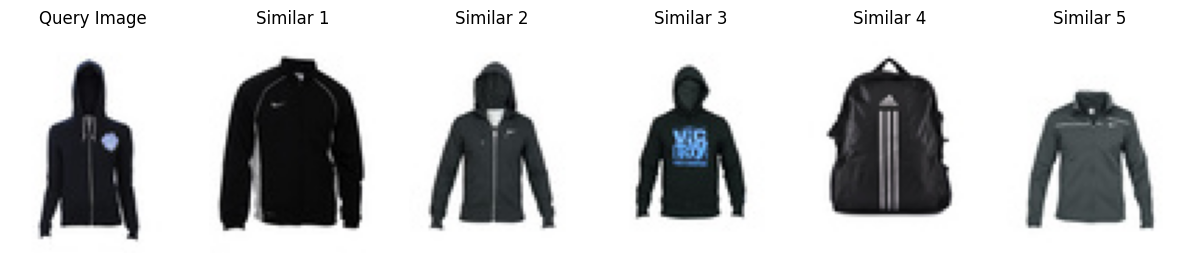

In [10]:

# Example usage:
recommend_similar_images("/kaggle/input/fashion-product-images-small/images/10029.jpg", model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


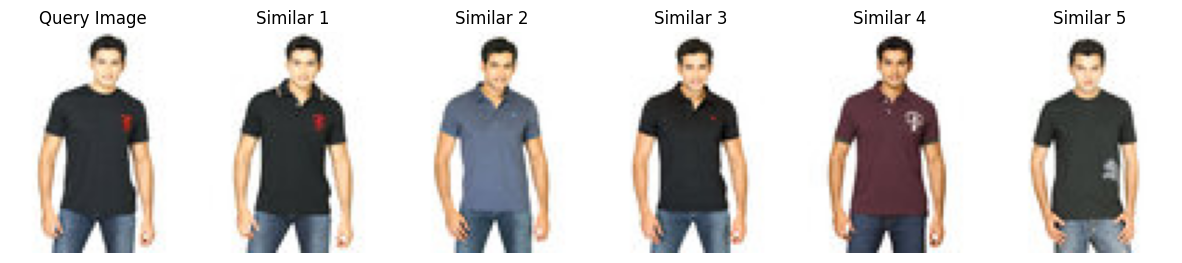

In [11]:

# Example usage:
recommend_similar_images("/kaggle/input/fashion-product-images-small/images/10044.jpg", model)


In [ ]:

# Example usage:
recommend_similar_images("/kaggle/input/fashion-product-images-dataset/fashion-dataset/images/10029.jpg", model)


In [15]:
filenames = [os.path.join(file) for file in os.listdir(images_path)]
pickle.dump(filenames,open('filenames_updated.pkl','wb'))